In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ
from qiskit import BasicAer, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
import networkx as nx
from random_graph import random_graph
from itertools import product

/Users/Riley/anaconda3/lib/python3.6/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


In [2]:
#take a state vector and turn it into an array for 
vertices=2
colors=2
qubits=vertices*colors
#Assume qubits (0,1) represent (red0,blue0) and (2,3) represent (red1,blue1) 

#lists of q and c registers
qr=QuantumRegister(qubits)
cr=ClassicalRegister(qubits)
#for i in range(vertices):
#    #make a list of quantum registers for the qubits in each vertex with a qubit in each register for each color
#    vertex_q_registers.append(QuantumRegister(colors))
#    vertext_c_registers.append(ClassicalRegister(colors))
    
circ=QuantumCircuit(qr,cr)
#circ=QuantumCircuit(vertex_q_regs[i] for i in range(vertices),vertex_c_regs[i] for i in range(vertices))
#generage some sample state
for i in range(qubits):
    circ.h(qr[i])

circ.measure(qr,cr)

In [3]:
backend_sim=BasicAer.get_backend('qasm_simulator')
result=execute(circ, backend_sim).result()

/Users/Riley/anaconda3/lib/python3.6/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


/Users/Riley/anaconda3/lib/python3.6/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


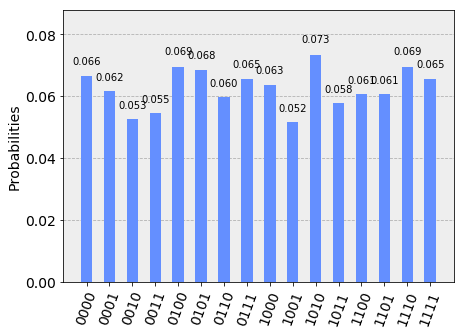

In [4]:
counts=result.get_counts(circ)
plot_histogram(counts)

In [5]:
#for n qubits what construct the hamming weight 1 binary strings
#data={'1001':30,'1101':11,'0101':15}
data=counts
bad_strings=[]

good_data={}
dumpster={'bad':0}

for k,v in data.items():
    for j in range(vertices):
        if k[j*colors:(j+1)*colors].count('1') != 1 and k not in bad_strings:
            bad_strings.append(k)

for i in bad_strings:
    dumpster['bad'] += data[i]
    
for k,v in data.items():
    if k not in bad_strings:
        good_data[k]=v

color_data={}
if colors==2:
    for k,v in good_data.items():
        color_code=''
        for j in range(vertices):
            if k[j*colors:(j+1)*colors]=='01':
                color_code+='0'
            else:
                color_code+='1'
        color_data[k]=color_code
elif colors==3:
    for k,v in good_data.items():
        color_code=''
        for j in range(vertices):
            if k[j*colors:(j+1)*colors]=='001':
                color_code+='0'
            elif k[j*colors:(j+1)*colors]=='010':
                color_code+='1'
            else:
                color_code+='2'
        color_data[k]=color_code
elif colors==4:
    for k,v in good_data.items():
        color_code=''
        for j in range(vertices):
            if k[j*colors:(j+1)*colors]=='0001':
                color_code+='0'
            elif k[j*colors:(j+1)*colors]=='0010':
                color_code+='1'
            elif k[j*colors:(j+1)*colors]=='0010':
                color_code+='2'
            else:
                color_code+='3'
        color_data[k]=color_code

best_solution=max(good_data, key=good_data.get)
best_color=color_data[best_solution]

total_data={**good_data,**dumpster}

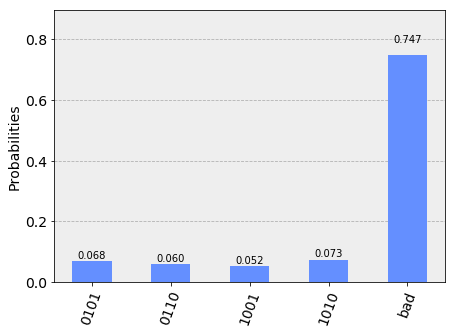

In [6]:
plot_histogram(total_data)

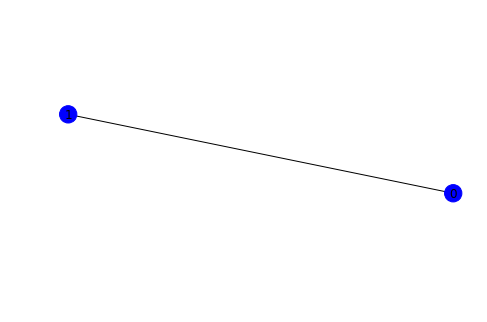

In [7]:
#graph=random_graph(vertices,edge_prob=1)
#G = nx.from_numpy_matrix(graph) 
color_map=[]
for node in G:
    if best_color[node]=='0':
        color_map.append('red')
    elif best_color[node]=='1':
        color_map.append('blue')
    elif best_color[node]=='2':
        color_map.append('green')
    elif best_color[node]=='3':
        color_map.append('yellow')
        
nx.draw(G,node_color=color_map, with_labels=True)

In [8]:
def generate_histogram(vertices,colors,counts):
    data=counts
    bad_strings=[]

    #bin_string_list = [''.join(p) for p in product('10', repeat=N)]
    #bin_string_list.sort(key=lambda s: s.count('1'))
    # ex. N=3bits ['000', '100', '010', '001', '110', '101', '011', '111']
    good_data={}
    dumpster={'bad':0}
    
    for k,v in data.items():
        for j in range(vertices):
            if k[j*colors:(j+1)*colors].count('1') != 1 and k not in bad_strings:
                bad_strings.append(k)
    
    for i in bad_strings:
        dumpster['bad'] += data[i]
        
                                         

    for k,v in data.items():
        if k not in bad_strings:
            good_data[k]=v
    

    color_data={}
    if colors==2:
        for k,v in good_data.items():
            color_code=''
            for j in range(vertices):
                if k[j*colors:(j+1)*colors]=='01':
                    color_code+='0'
                else:
                    color_code+='1'
            color_data[k]=color_code
    elif colors==3:
        for k,v in good_data.items():
            color_code=''
            for j in range(vertices):
                if k[j*colors:(j+1)*colors]=='001':
                    color_code+='0'
                elif k[j*colors:(j+1)*colors]=='010':
                    color_code+='1'
                else:
                    color_code+='2'
            color_data[k]=color_code
    elif colors==4:
        for k,v in good_data.items():
            color_code=''
            for j in range(vertices):
                if k[j*colors:(j+1)*colors]=='0001':
                    color_code+='0'
                elif k[j*colors:(j+1)*colors]=='0010':
                    color_code+='1'
                elif k[j*colors:(j+1)*colors]=='0010':
                    color_code+='2'
                else:
                    color_code+='3'
            color_data[k]=color_code
    try:
        best_solution=max(good_data, key=good_data.get)
        best_color=color_data[best_solution]

    except ValueError:
        print('no solutions in dataset')
    
    total_data={**good_data,**dumpster}
    print(total_data)
    plot_histogram(total_data)
    

no solutions in dataset
{'bad': 1024}
